In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 300)

In [4]:
df = pd.read_csv('./Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Remove unnecessary columns

In [5]:
df.drop(['customerID'], axis=1, inplace=True)

### Change the data type of 'TotalCharges' column from object to number

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# Will give an error because of null values
# pd.to_numeric(df['TotalCharges'])

In [9]:
pd.to_numeric(df['TotalCharges'], errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

### Remove Records where TotalCharges value is null

In [10]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()].shape

(11, 20)

In [14]:
df.shape

(7043, 20)

In [15]:
df1 = df[df['TotalCharges'] != ' ']
df1.shape

(7032, 20)

In [16]:
df1.TotalCharges.dtype

dtype('O')

In [19]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\dell\AppData\Local\Temp\ipykernel_1512\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [20]:
df1.TotalCharges.dtype

dtype('float64')

### Plot Churn Histogram against Tenure

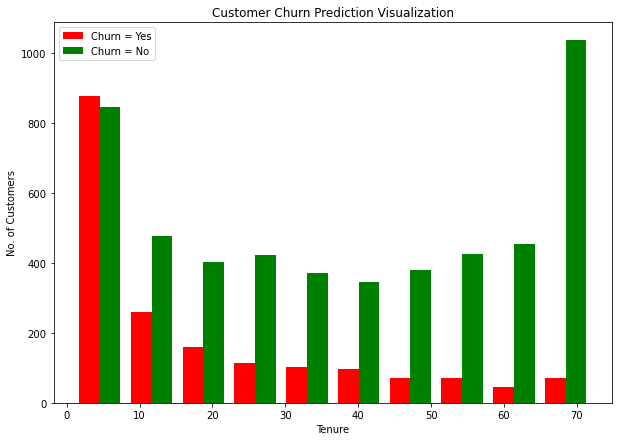

In [21]:
tenure_churn_no = df1[df1['Churn'] == 'No'].tenure
tenure_churn_yes = df1[df1['Churn'] == 'Yes'].tenure

plt.figure(figsize=(10,7))
plt.hist([tenure_churn_yes, tenure_churn_no], color=['red','green'], label=['Churn = Yes', 'Churn = No'])
plt.xlabel('Tenure')
plt.ylabel('No. of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.legend()

### Plot Churn Histogram against Monthly Charges

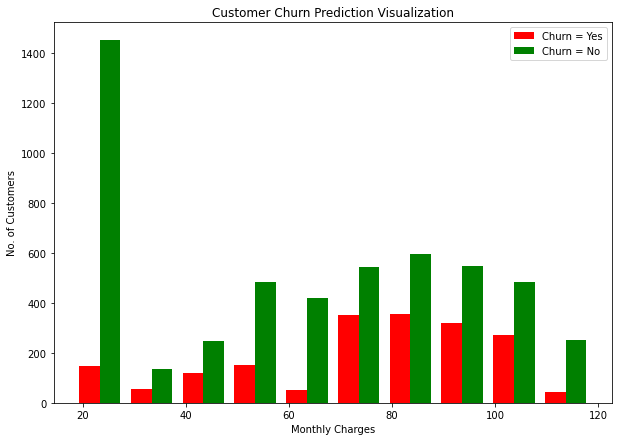

In [22]:
MonthlyCharges_churn_no = df1[df1['Churn'] == 'No'].MonthlyCharges
MonthlyCharges_churn_yes = df1[df1['Churn'] == 'Yes'].MonthlyCharges

plt.figure(figsize=(10,7))
plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], color=['red','green'], label=['Churn = Yes', 'Churn = No'])
plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.legend()

### Separate out categorical columns for One-Hot Encoding

In [23]:
def print_unique_col_values(df):
    
    for col in df:
        if df[col].dtype == 'object':
            print(f'{col} : {df[col].unique()}')

In [24]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [25]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_1512\4245438437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_1512\4245438437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [26]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [27]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_1512\2142374365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)


In [28]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [29]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_1512\3951318906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [30]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [31]:
len(df1.columns)

20

In [32]:
len(df2.columns)

27

### Scale Data

In [33]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [34]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [35]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5786,1,0,1,0,1.000000,1,1,1,0,1,1,1,1,1,0.658209,0.701321,0,1,0,0,0,0,1,0,1,0,0
6178,1,1,1,0,0.746479,1,0,0,0,0,0,0,0,1,0.006965,0.116813,0,0,0,1,0,0,1,0,0,0,1
1537,1,0,1,1,1.000000,1,1,0,1,0,1,1,1,1,0.603980,0.659053,0,1,0,0,0,0,1,0,0,1,0


### Split Train and Test Data

In [36]:
X = df2.drop('Churn', axis=1)
y = df2.Churn

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
X_train.shape, y_train.shape

((5625, 26), (5625,))

In [40]:
X_test.shape, y_test.shape

((1407, 26), (1407,))

### Create a Model

In [45]:
def ANN(X_train, y_train, X_test, y_test, epcs):
    model = keras.Sequential([
        keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    #     keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=100)
    
    print("Model Evaluation : \n", model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report : \n", classification_report(y_test, y_preds))
    
    return y_preds

In [47]:
y_predicted = ANN(X_train, y_train, X_test, y_test, 100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5374 - accuracy: 0.7179
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.7838
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.7908
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.7941
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.7963
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.7956
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4225 - accuracy: 0.7966
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8004
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4194 - accuracy: 0.7995
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4191 - accura

176/176 [==============================] - 1s 4ms/step - loss: 0.3947 - accuracy: 0.8140
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3939 - accuracy: 0.8133
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8116
Epoch 84/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8167
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3938 - accuracy: 0.8156
Epoch 86/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8155
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8162
Epoch 88/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3942 - accuracy: 0.8142
Epoch 89/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3929 - accuracy: 0.8169
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 

In [48]:
176*32

5632

In [58]:
y_predicted.reshape(1407)[:5]

array([0., 0., 0., 0., 0.], dtype=float32)

### Confusion Matrix

In [59]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[927, 109],
       [177, 194]], dtype=int64)

Text(51.0, 0.5, 'Truth')

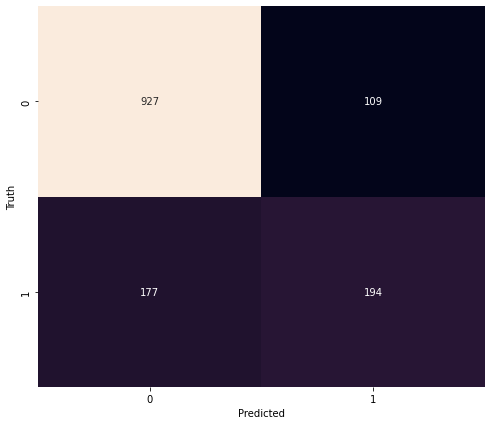

In [61]:
plt.figure(figsize=(8,7))
sn.heatmap(cm, annot=True, fmt='d',cbar=False)
plt.xlabel("Predicted")
plt.ylabel('Truth')

### Handle Imbalanced data with SMOTE

In [64]:
from imblearn.over_sampling import SMOTE

In [70]:
smote = SMOTE(sampling_strategy='minority')

X_sm, y_sm = smote.fit_resample(X, y)

In [69]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [71]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm)

In [75]:
y_predicted = ANN(X_train, y_train, X_test, y_test, 100)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5643 - accuracy: 0.7114
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4800 - accuracy: 0.7694
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4676 - accuracy: 0.7789
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4617 - accuracy: 0.7794
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4578 - accuracy: 0.7811
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4554 - accuracy: 0.7835
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4520 - accuracy: 0.7858
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4494 - accuracy: 0.7849
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4465 - accuracy: 0.7887
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4453 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3828 - accuracy: 0.8297
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3837 - accuracy: 0.8285
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3820 - accuracy: 0.8306
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3811 - accuracy: 0.8303
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3824 - accuracy: 0.8301
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 0.8295
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3800 - accuracy: 0.8298
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3797 - accuracy: 0.8318
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3793 - accuracy: 0.8314
Epoch 90/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3792 - accuracy: 

### Confusion Matrix

In [76]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[787, 246],
       [145, 888]], dtype=int64)

Text(51.0, 0.5, 'Truth')

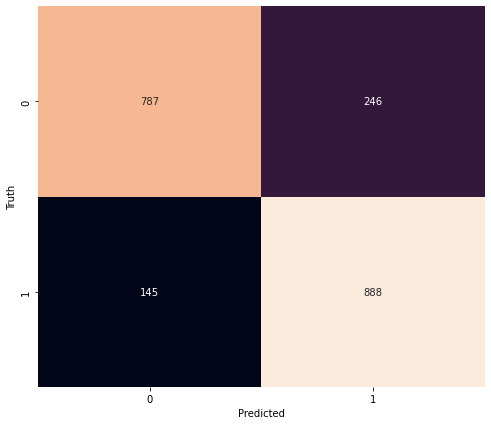

In [77]:
plt.figure(figsize=(8,7))

sn.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')